## keras构建回归网络

### 序列模型
keras.models.Sequential 类是神经网络模型的封装容器。它会提供常见的函数，例如 fit()、evaluate() 和 compile()。

* 使用 Sequential 建立 model
* 使用 model.add 添加神经层，添加的是 Dense 全连接神经层
* 参数有两个，一个是输入数据和输出数据的维度
* 如果需要添加下一个神经层的时候，不用再定义输入的纬度，因为它默认就把前一层的输出作为当前层的输入


In [50]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

%matplotlib inline

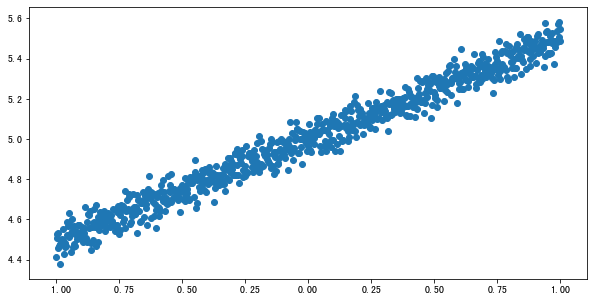

In [51]:
# create some data
X = np.linspace(-1, 1, 800)
np.random.shuffle(X)    # randomize the data
Y = 0.5 * X + 5 + np.random.normal(0, 0.05, (800, ))
# plot data
plt.figure(figsize=(10, 5))
plt.scatter(X, Y)

### 拆分数据集

In [52]:
X_train, Y_train = X[:600], Y[:600]     # train 前 160 data points
X_test, Y_test = X[600:], Y[600:]       # test 后 40 data points

### 定义模型

In [53]:
model = Sequential()
model.add(Dense(input_dim=1, output_dim=1))

/Users/qihengshan/pythonEnv/python374/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  


### 编译模型

**指定损失函数、优化器**

In [54]:
model.compile(loss='mse', optimizer='sgd')

### 训练模型

In [55]:
print('Training -----------')
for step in range(601):
    loss = model.train_on_batch(X_train, Y_train, sample_weight=None, class_weight=None, reset_metrics=True)
    if step % 100 == 0:
        print('train loss: ', cost)

Training -----------
train loss:  0.0023661290761083364
train loss:  0.0023661290761083364
train loss:  0.0023661290761083364
train loss:  0.0023661290761083364
train loss:  0.0023661290761083364
train loss:  0.0023661290761083364
train loss:  0.0023661290761083364


### 检验模型

用到的函数是 model.evaluate(X_test, Y_test)，输入测试集的x和y， 输出 cost，weights 和 biases。其中 weights 和 biases 是取在模型的第一层 model.layers[0] 学习到的参数。从学习到的结果你可以看到, weights 比较接近0.5，bias 接近 3。



In [56]:
cost = model.evaluate(X_test, Y_test, batch_size=100)
print(f"Test loss: {cost}")
# 获取第一层的训练参数
W, b = model.layers[0].get_weights()
print(f"Weight: {W}, bias: {b}")


200/200 [==============================] - 0s 67us/step
Test loss: 0.00247938116081059
Weight: [[0.4878996]], bias: [4.9975147]


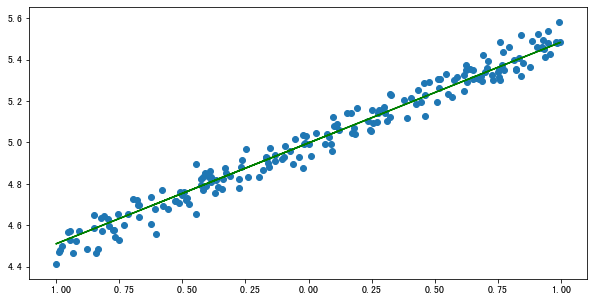

In [57]:
# get  predict value
Y_pred = model.predict(X_test)
# original test set scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(X_test, Y_test)
# line plot
plt.plot(X_test, Y_pred, c='g')


In [58]:
# 返回Loss标量
model.metrics_names

['loss']